In [1]:
import torch
import torchvision

In [2]:
train_data = torchvision.datasets.FashionMNIST(
root='data',
train=True, 
download=True,
transform=torchvision.transforms.ToTensor(),
target_transform=None)

In [3]:
test_data = torchvision.datasets.FashionMNIST(
root='data',
train=False, 
download=True,
transform=torchvision.transforms.ToTensor(),
target_transform=None)

In [4]:
len(train_data)

60000

In [5]:
len(test_data)

10000

In [6]:
image, label = train_data[0]

In [7]:
image.shape

torch.Size([1, 28, 28])

In [8]:
label

9

In [9]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [10]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
import matplotlib.pyplot as plt

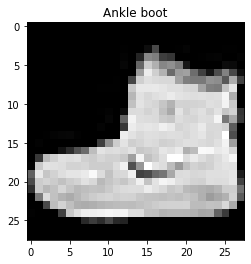

In [12]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

In [13]:
image, label = train_data[7]

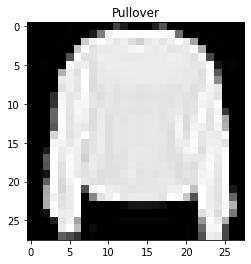

In [14]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label]);

In [15]:
from torch.utils.data import DataLoader

In [16]:
batch_size = 32

train_DL = DataLoader(dataset=train_data, 
                     batch_size=batch_size,
                     shuffle=True)
test_DL = DataLoader(dataset=test_data, 
                     batch_size=batch_size,
                     shuffle=False)

In [17]:
len(train_DL)

1875

In [18]:
len(test_DL)

313

In [19]:
from sklearn.metrics import accuracy_score as acc

In [20]:
class Picture_cl_1(torch.nn.Module):
    def __init__(self, inp, out, hidden_units):
        super().__init__()
        self.conv_1 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=inp,
                       out_channels=hidden_units, kernel_size=3, 
                        stride=1, padding=1),
        torch.nn.ReLU(), 
        torch.nn.Conv2d(in_channels=hidden_units,
                       out_channels=hidden_units, kernel_size=3, 
                        stride=1, padding=1),
        torch.nn.ReLU(),    
        torch.nn.MaxPool2d(kernel_size=2))
            
        self.conv_2 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=hidden_units,
                       out_channels=hidden_units, kernel_size=3, 
                        stride=1, padding=1),
        torch.nn.ReLU(), 
        torch.nn.Conv2d(in_channels=hidden_units,
                       out_channels=hidden_units, kernel_size=3, 
                        stride=1, padding=1),
        torch.nn.ReLU(),    
        torch.nn.MaxPool2d(kernel_size=2))
        
        self.classifier = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=hidden_units*7*7,
                           out_features=out))    
        
    def forward(self, x):
        x = self.conv_1(x)
        x = self.conv_2(x)
        x = self.classifier(x)
        return x

In [21]:
torch.manual_seed(15)

mod_1 = Picture_cl_1(inp=1, out=len(class_names),
                    hidden_units=15)

In [22]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=mod_1.parameters(), lr=0.1)

In [23]:
epochs = 10

for i in range(1, epochs+1):
        
    train_loss, train_acc = 0, 0
    
    for x, y in train_DL:
        mod_1.train()
        y_logits = mod_1(x)
        
        loss=loss_fn(y_logits, y)
        tr_acc= acc(y, y_logits.argmax(dim=1))
        train_loss +=loss
        train_acc += tr_acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_DL)
    train_acc /= len(train_DL)
    
    test_loss, test_acc = 0, 0
    mod_1.eval()
    with torch.inference_mode():
        for x_test, y_test in test_DL:
            test_logits = mod_1(x_test)
            
            test_loss += loss_fn(test_logits, y_test)
            test_acc += acc(y_test, test_logits.argmax(dim=1))
            
        test_loss /= len(test_DL)
        test_acc /= len(test_DL)
        
    print(f'Epoch: {i} | Loss: {train_loss:.4f} | Train_acc: {train_acc:.4f}| Test_loss: {test_loss:.4f} | Test_acc: {test_acc:.4f}')
    print()

Epoch: 1 | Loss: 0.5493 | Train_acc: 0.7993| Test_loss: 0.3936 | Test_acc: 0.8520

Epoch: 2 | Loss: 0.3375 | Train_acc: 0.8789| Test_loss: 0.3357 | Test_acc: 0.8807

Epoch: 3 | Loss: 0.2959 | Train_acc: 0.8930| Test_loss: 0.3096 | Test_acc: 0.8892

Epoch: 4 | Loss: 0.2717 | Train_acc: 0.9004| Test_loss: 0.3190 | Test_acc: 0.8851

Epoch: 5 | Loss: 0.2566 | Train_acc: 0.9059| Test_loss: 0.2952 | Test_acc: 0.8948

Epoch: 6 | Loss: 0.2430 | Train_acc: 0.9122| Test_loss: 0.2657 | Test_acc: 0.9038

Epoch: 7 | Loss: 0.2349 | Train_acc: 0.9141| Test_loss: 0.2563 | Test_acc: 0.9082

Epoch: 8 | Loss: 0.2258 | Train_acc: 0.9185| Test_loss: 0.2614 | Test_acc: 0.9044

Epoch: 9 | Loss: 0.2231 | Train_acc: 0.9190| Test_loss: 0.2623 | Test_acc: 0.9069

Epoch: 10 | Loss: 0.2155 | Train_acc: 0.9219| Test_loss: 0.2460 | Test_acc: 0.9123

